In [63]:
%matplotlib inline

from PIL import Image
from PIL import ImageFilter
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
import math
import tabulate

def plot_two_image(first_image, first_description, second_image, second_description):
    fig = plt.figure()
    
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(first_image)
    a.set_title(first_description)

    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(second_image)
    a.set_title(second_description)

    
def binarize_image(image, threshold):
    image = image.convert('LA')
    image = np.array(image)
    for raw in image:
        for column in raw:
            column[0] = 255 if column[0] < threshold else 0
    return Image.fromarray(image)


def get_centroids(image):
    label_img = label(image)
    regions = regionprops(label_img)
    return np.array([region.centroid for region in regions])


def points_to_image(image, points):
    array = np.array(image)
    for y, x in points:
        array[int(y), int(x)] = [0, 255]

    image = Image.fromarray(array)
    return image


In [6]:

# set current_directory with Path function cwd() [Current Working Directory]
current_directory = Path.cwd()

# path to access our image
image_path = current_directory.joinpath('img/unprepared_image.png')

print(f'Current directory: {current_directory}')
print(f'Image path: {image_path}')

# open image with Pillow
raw_image = Image.open(image_path)
# convert image to grayscale
image_grayscale = raw_image.convert(mode='LA')

Current directory: /Users/mor1ins/projects/diploma
Image path: /Users/mor1ins/projects/diploma/img/unprepared_image.png


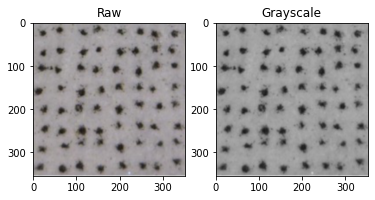

In [7]:
plot_two_image(raw_image, 'Raw', image_grayscale, 'Grayscale')

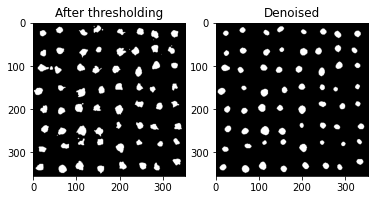

In [8]:
black_white_image = binarize_image(image_grayscale, threshold=110)
deleted_noise_image = black_white_image.filter(ImageFilter.MedianFilter(11))

plot_two_image(black_white_image, 'After thresholding', deleted_noise_image, 'Denoised')

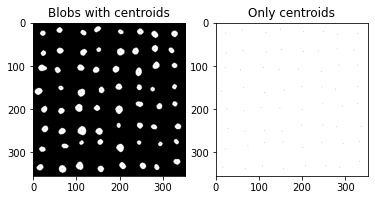

In [64]:
pixels_array = np.array(deleted_noise_image.convert(mode='1'))
centroids = get_centroids(pixels_array) 

plot_two_image(points_to_image(deleted_noise_image, centroids), 'Blobs with centroids',
               points_to_image(np.zeros_like(deleted_noise_image), centroids), 'Only centroids')

In [82]:
def print_columns(it):
    print(tabulate.tabulate(it, [f'Col {i}' for i in range(1, N + 1)], tablefmt="fancy_grid"))

centroids_in_grid = centroids[np.argsort(centroids[:, 0])].reshape(N, N, 2)

for i in range(N):
    centroids_in_grid[i] = centroids_in_grid[i][np.argsort(centroids_in_grid[i][:, 1])]
    
N = int(math.sqrt(len(centroids)))

x_coordinates_of_centroids = centroids_in_grid[:, :, 0]
print_columns(x_coordinates_of_centroids.transpose())

╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│   Col 1 │   Col 2 │   Col 3 │   Col 4 │   Col 5 │   Col 6 │   Col 7 │   Col 8 │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ 22.3136 │ 60.797  │ 115.976 │ 148.362 │ 201.971 │ 247.07  │ 280.584 │ 326.136 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 23.5877 │ 62.1212 │ 116.097 │ 151.284 │ 201.775 │ 236.168 │ 280.983 │ 318.938 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 21.1843 │ 56.3451 │ 109.746 │ 145.16  │ 190.906 │ 243.4   │ 283.59  │ 326.134 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 12.3972 │ 63.9681 │ 111.246 │ 157.633 │ 197.647 │ 244.785 │ 275.593 │ 326.051 │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 25.5926 │ 64.9097 │ 105.657 │ 147.294 │ 198.2   │ 245.096 │ 291.181 │ 326.887 │
├─────────┼─────

In [83]:
def print_rows(it):
    print(tabulate.tabulate(
        [[f'Row {i}'] + list(row) for i, row in zip(range(1, N + 1), it)], 
        [], tablefmt="fancy_grid"))

y_coordinates_of_centroids = centroids_in_grid[:, :, 1]
print_rows(y_coordinates_of_centroids.transpose())

╒═══════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ Row 1 │  25.3475 │  18.1429 │  24.0635 │  16.0921 │  22.1524 │  21.6772 │  28.0216 │  26.6331 │
├───────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Row 2 │  71.3246 │  65.5636 │  69.233  │  63.3068 │  68.1982 │  66.7011 │  60.5491 │  64.8281 │
├───────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Row 3 │ 105.429  │ 110.092  │ 104.74   │ 109.809  │ 108.486  │ 114.423  │  99.65   │  99.6807 │
├───────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Row 4 │ 159.215  │ 151.511  │ 162.279  │ 156.17   │ 148.76   │ 149.992  │ 154.358  │ 148.602  │
├───────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Row 5 │ 200.747  │ 204.284  │ 197.556  │ 197.797  │ 201.488  │ 188.687  │ 193.771  │ 188.198  │
├───────┼──────────┼

In [105]:
max_x = x_coordinates_of_centroids.max(axis = 1)
min_x = x_coordinates_of_centroids.min(axis = 1)
difference_x = max_x - min_x

# intervals_x = [[1/3 * difference_x.max(), 2/3 * difference_x.max(), difference_x.max()]]
average_x = x_coordinates_of_centroids.mean(axis = 1)

threshold_for_class = 2/3 * difference_x.max()
classes_x = [ 'A' if diff > threshold_for_class else 'B' for diff in difference_x ]
print()
print(tabulate.tabulate(
        [['min'] + list(min_x), ['max'] + list(max_x), 
         ['diff'] + list(difference_x), ['avg'] + list(average_x)
        ], [f'x_{i}' for i in range(N)], tablefmt="fancy_grid"
    )
)

print(tabulate.tabulate(
    [['class'] + classes_x], [f'x_{i}' for i in range(N)], tablefmt="fancy_grid"
))
# print(tabulate.tabulate(intervals_x, ['1/3 max', '2/3 max', 'max'], tablefmt="fancy_grid"))


╒══════╤═════════╤═════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│      │     x_0 │     x_1 │      x_2 │      x_3 │      x_4 │      x_5 │      x_6 │      x_7 │
╞══════╪═════════╪═════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ min  │ 12.3972 │ 56.3451 │ 105.657  │ 145.16   │ 190.906  │ 236.168  │ 275.593  │ 318.938  │
├──────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ max  │ 27.1503 │ 73.2761 │ 116.097  │ 157.633  │ 206.244  │ 253.091  │ 293.308  │ 334.199  │
├──────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ diff │ 14.7531 │ 16.931  │  10.4397 │  12.4722 │  15.3384 │  16.9224 │  17.7151 │  15.2612 │
├──────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ avg  │ 21.1529 │ 64.4665 │ 111.302  │ 151.597  │ 199.364  │ 245.019  │ 283.636  │ 327.543  │
╘══════╧═════════╧═════════╧══════════╧══════════

In [108]:
max_y = y_coordinates_of_centroids.max(axis = 0)
min_y = y_coordinates_of_centroids.min(axis = 0)
difference_y = max_y - min_y


threshold_for_class = 2/3 * difference_y.max()
classes_y = [ 'A' if diff > threshold_for_class else 'B' for diff in difference_y ]
average_y = y_coordinates_of_centroids.mean(axis = 0)

print(tabulate.tabulate(
    zip([f'y_{i}' for i in range(N)], min_y, max_y, difference_y, average_y, classes_y), 
    ['min', 'max', 'diff', 'avg', 'class'], tablefmt="fancy_grid")
)

# print(tabulate.tabulate(intervals_y, ['1/3 max', '2/3 max', 'max'], tablefmt="fancy_grid"))

╒═════╤══════════╤══════════╤═════════╤══════════╤═════════╕
│     │      min │      max │    diff │      avg │ class   │
╞═════╪══════════╪══════════╪═════════╪══════════╪═════════╡
│ y_0 │  16.0921 │  28.0216 │ 11.9295 │  22.7663 │ A       │
├─────┼──────────┼──────────┼─────────┼──────────┼─────────┤
│ y_1 │  60.5491 │  71.3246 │ 10.7754 │  66.2131 │ B       │
├─────┼──────────┼──────────┼─────────┼──────────┼─────────┤
│ y_2 │  99.65   │ 114.423  │ 14.7727 │ 106.539  │ A       │
├─────┼──────────┼──────────┼─────────┼──────────┼─────────┤
│ y_3 │ 148.602  │ 162.279  │ 13.6771 │ 153.861  │ A       │
├─────┼──────────┼──────────┼─────────┼──────────┼─────────┤
│ y_4 │ 188.198  │ 204.284  │ 16.0858 │ 196.566  │ A       │
├─────┼──────────┼──────────┼─────────┼──────────┼─────────┤
│ y_5 │ 237.798  │ 251.578  │ 13.7803 │ 244.551  │ A       │
├─────┼──────────┼──────────┼─────────┼──────────┼─────────┤
│ y_6 │ 275.32   │ 292.696  │ 17.3757 │ 281.83   │ A       │
├─────┼──────────┼──────

In [89]:
def split_into_three_intervals(minimum, maximum):
    diff = maximum - minimum
    border_1 = minimum + 1/3 * diff
    border_2 = minimum + 2/3 * diff
    return ((minimum, border_1), (border_1, border_2), (border_2, maximum))

def value_belongs_to_interval(value, interval):
    return interval[0] <= value and value <= interval[1]

def get_position_code(value, intervals, codes):
    for i in range(len(intervals)):
        if value_belongs_to_interval(value, intervals[i]):
            return codes[i]

intervals_x = [split_into_three_intervals(*minmax) for minmax in zip(min_x, max_x)]
posibles_codes = [-1, 0, 1]

x_codes = np.zeros_like(x_coordinates_of_centroids)
for i in range(len(x_coordinates_of_centroids)):
    for j in range(len(x_coordinates_of_centroids[i])):
        value = x_coordinates_of_centroids[i,j]
        interval = intervals_x[i]
        x_codes[i,j] = get_position_code(value, interval, posibles_codes)

print_columns(x_codes)

[((12.397196261682243, 17.314893846901843), (17.314893846901843, 22.232591432121442), (22.232591432121442, 27.15028901734104)), ((56.34507042253521, 61.9887534160185), (61.9887534160185, 67.63243640950179), (67.63243640950179, 73.27611940298507)), ((105.65690376569037, 109.13679948015722), (109.13679948015722, 112.61669519462406), (112.61669519462406, 116.0965909090909)), ((145.1604938271605, 149.31788023851516), (149.31788023851516, 153.47526664986984), (153.47526664986984, 157.6326530612245)), ((190.9060773480663, 196.01886638019235), (196.01886638019235, 201.1316554123184), (201.1316554123184, 206.24444444444444)), ((236.16847826086956, 241.8092885375494), (241.8092885375494, 247.45009881422925), (247.45009881422925, 253.0909090909091)), ((275.5925925925926, 281.4976258309592), (281.4976258309592, 287.40265906932575), (287.40265906932575, 293.3076923076923)), ((318.9375, 324.0245584988962), (324.0245584988962, 329.1116169977925), (329.1116169977925, 334.19867549668874))]
╒═════════╤

In [90]:
intervals_y = [split_into_three_intervals(*minmax) for minmax in zip(min_y, max_y)]

y_codes = np.zeros_like(y_coordinates_of_centroids)
for i in range(len(y_coordinates_of_centroids)):
    for j in range(len(y_coordinates_of_centroids[i])):
        value = y_coordinates_of_centroids[j,i]
        interval = intervals_y[i]
        y_codes[j,i] = get_position_code(value, interval, posibles_codes)

print_rows(y_codes)

╒═══════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ Row 1 │  1 │  1 │  0 │  1 │  1 │  0 │  1 │  1 │
├───────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ Row 2 │ -1 │  0 │  1 │ -1 │  1 │  1 │  0 │  1 │
├───────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ Row 3 │  1 │  1 │  0 │  1 │  0 │  1 │ -1 │  0 │
├───────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ Row 4 │ -1 │ -1 │  1 │  0 │  0 │  1 │ -1 │  1 │
├───────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ Row 5 │  0 │  1 │  0 │ -1 │  1 │ -1 │  1 │  0 │
├───────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ Row 6 │  0 │  0 │  1 │ -1 │ -1 │ -1 │ -1 │  0 │
├───────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ Row 7 │  1 │ -1 │ -1 │  0 │  0 │ -1 │ -1 │  1 │
├───────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ Row 8 │  1 │  0 │ -1 │ -1 │ -1 │ -1 │ -1 │ -1 │
╘═══════╧════╧════╧════╧════╧════╧════╧════╧════╛
